In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

The decomposition of time series is a statistical task that deconstructs a time series into several components

Trend component - which reflects the long-term progression of the series - Trend can be positive or negative or both

Seasonal Component - includes cyclical component

Noise or residual - remainder of the time series after the other components have been removed

AR and MA model assumes time series to be stationary and real-world data - they are often governed by a (deterministic) trend and they might have (deterministic) cyclical or seasonal components

In [2]:
!pip install download

In [3]:
from __future__ import absolute_import,division,print_function,unicode_literals

import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import os
from datetime import datetime

import pandas as pd

from download import download

mpl.rcParams['figure.figsize'] = (8,6)
mpl.rcParams['axes.grid'] = False

In [4]:
def convert_to_date(x):
    return datetime.strptime(x,'%m/%d/%Y')

In [5]:
df=pd.read_csv('https://raw.githubusercontent.com/srivatsan88/YouTubeLI/master/dataset/amazon_revenue_profit.csv',
              parse_dates=['Quarter'],date_parser=convert_to_date)

In [6]:
df.head()

,Quarter,Revenue,Net Income
0,2020-03-31,75452,2535
1,2019-12-31,87437,3268
2,2019-09-30,69981,2134
3,2019-06-30,63404,2625
4,2019-03-31,59700,3561


In [7]:
import plotly.express as px
fig = px.line(df, x = 'Quarter',y = 'Revenue',title = 'Amazon Revenue')

fig.update_xaxes(
    rangeslider_visible= True,
    rangeselector=dict(
                        buttons = list([
                        dict(count = 3,label = '1y',step='year',stepmode = "backward"),
                        dict(count = 9,label = '3y',step='year',stepmode = "backward"),
                        dict(count = 15,label = '5y',step='year',stepmode = "backward"),
                        dict(step= 'all')
                            ])        
                        )
                   )
fig.show()

**We can see that trend and seasonality occurs in the plot**

**Null hypothesis: Data is stationary**

**Alternate hypothesis: Data is not stationary**

# Stationary: variance in data don't change over a period of time

In [9]:
from statsmodels.tsa.stattools import kpss

**Kwiatkowski–Phillips–Schmidt–Shin (KPSS) tests are used for testing a null hypothesis that an observable time series is stationary around a deterministic trend**

In [10]:
tstest=kpss(df['Revenue'],'ct')

/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/stattools.py:1661: FutureWarning:

The behavior of using lags=None will change in the next release. Currently lags=None is the same as lags='legacy', and so a sample-size lag length is used. After the next release, the default will change to be the same as lags='auto' which uses an automatic lag length selection method. To silence this warning, either use 'auto' or 'legacy'



In [11]:
tstest

(0.1700516821083097,
 0.029956931576408573,
 11,
 {'10%': 0.119, '5%': 0.146, '2.5%': 0.176, '1%': 0.216})

0.17 is the KPSS test stats falls in greater than 2.5% so the Null hypothesis is rejected
p values is 0.03 which means Null values is rejected
https://kite.com/python/docs/statsmodels.tsa.stattools.kpss

In [12]:
amz_df=df.set_index('Quarter')

# Decomposition

In [13]:
import statsmodels.api as sm


In [18]:
res=sm.tsa.seasonal_decompose(amz_df['Revenue'],model='multiplicative')

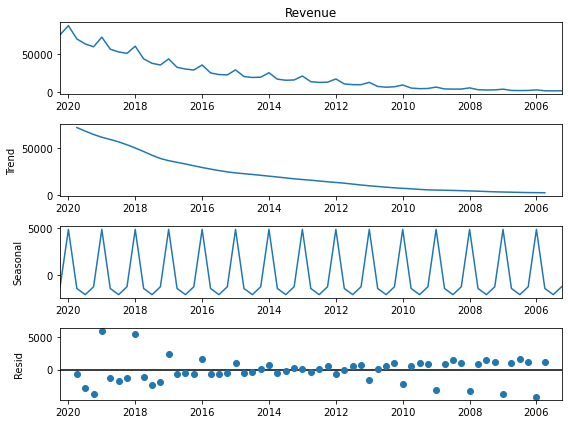

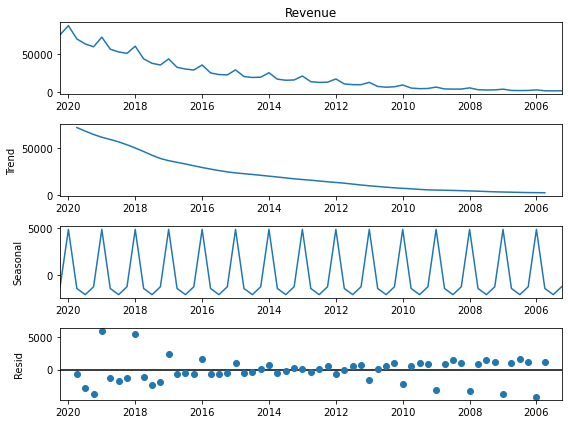

In [17]:
res.plot()

**As the trend is decreasing and there occurs seasonality in data**

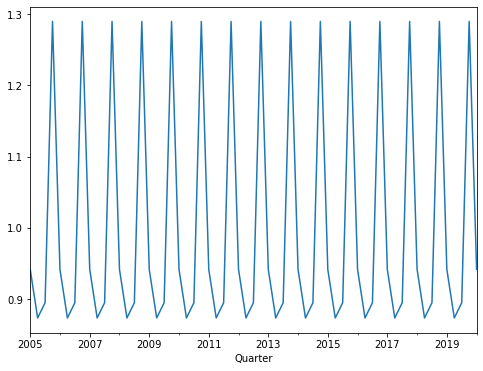

In [19]:
res.seasonal.plot()

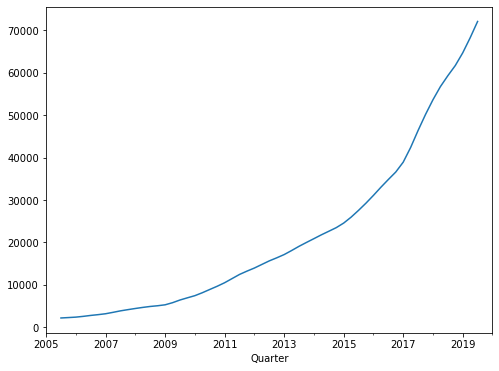

In [20]:
res.trend.plot()

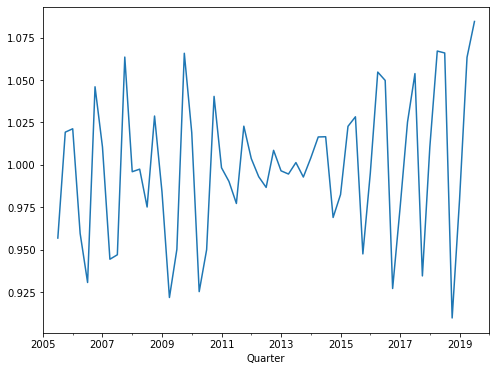

In [21]:
res.resid.plot()

In [22]:
res.resid

Quarter
2020-03-31         NaN
2019-12-31         NaN
2019-09-30    1.084496
2019-06-30    1.063372
2019-03-31    0.979831
                ...   
2006-03-31    1.021253
2005-12-31    1.019256
2005-09-30    0.956844
2005-06-30         NaN
2005-03-31         NaN
Name: resid, Length: 61, dtype: float64

**Observed value**

In [23]:
res.observed[4]

59700.0

**Value from the model**

In [24]:
res.seasonal[4]*res.trend[4]*res.resid[4]

59700.0

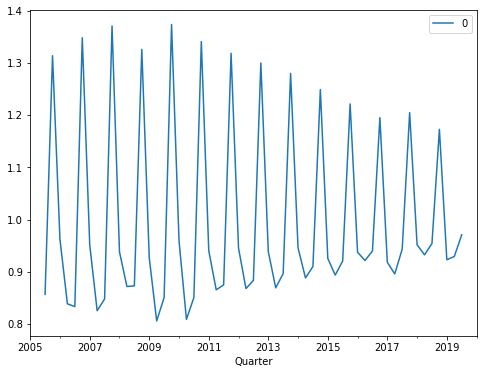

In [27]:
pd.DataFrame(res.observed/res.trend).plot()

**As the model is multiplicative, dividing the trend**